# Problème de Poisson et équation de la chaleur

&nbsp;

<center>**Loic Gouarin**</center>
<center>11 juillet 2017</center>

&nbsp;

On s'intéresse ici à résoudre le problème de Poisson en dimension $2$ ou $3$, sur un ouvert borné $\Omega$ de $\mathbb{R}^d$, $d=2$ ou $3$

$$
\left\{
\begin{array}{l}
-\Delta u = f \; \text{sur} \; \Omega, \\\\
u = g \; \text{sur} \; \partial \Omega.
\end{array}
\right.
$$

où $f$ et $g$ sont des fonctions données.

Pour des raisons de simplicité, nous chercherons à résoudre ce problème sur un domaine rectangulaire.

Prenons le cas en dimension $2$ où $\Omega=[a, b]\times[c, d]$. Pour construire une solution approchée, on se donne $2$ entiers $N>1$ et $M>1$, les pas de discrétisation $h_x=\frac{b-a}{N+1}$ et $h_y=\frac{d-c}{M+1}$ et une grille du domaine $\Omega$ définie par

$$
\begin{array}{l}
x_i = a+ih_x  \; \text{pour} \; i=0,\cdots,N+1,\\
y_j = c+jh_y \; \text{pour} \; j=0,\cdots,M+1.
\end{array}
$$

On cherche à calculer une solution approchée notée $u_{i,j}$ aux points $(x_i, y_j)$. En utilisant des approximations de Taylor dans les deux directions, on approche le Laplacien par

$$
\Delta u(x_i, y_j) \approx \frac{u_{i-1,j}-2u_{i,j}+u_{i+1,j}}{h_x^2}+\frac{u_{i,j-1}-2u_{i,j}+u_{i,j+1}}{h_y^2}.
$$

On résout donc le problème discret suivant

$$
\left\{
\begin{array}{l}
\frac{-u_{i-1,j}+2u_{i,j}-u_{i+1,j}}{h_x^2}+\frac{-u_{i,j-1}+2u_{i,j}-u_{i,j+1}}{h_y^2} = f_{i,j} \; \text{pour} \; i=1,\cdots,N \; \text{et} \; j=1,\cdots,M, \\\\
u_{0,j} = g^1_j \; \text{pour} \; j=1,\cdots,M, \\\\
u_{N+1,j} = g^2_j \; \text{pour} \; j=1,\cdots,M, \\\\
u_{i,0} = g^3_i \; \text{pour} \; i=1,\cdots,N, \\\\
u_{i,M+1} = g^4_i \; \text{pour} \; i=1,\cdots,N.
\end{array}
\right.
$$

ce qui peut également se réécrire sous la forme matriciel suivante

$$
Au=
\left[
\begin{array}{ccccc}
A_x & A_y & 0 & \cdots & 0 \\
A_y & A_x & A_y & \ddots & \vdots \\
0 & \ddots & \ddots& \ddots & 0\\
\vdots& \ddots& A_y & A_x & A_y \\
0& \cdots& 0& A_y & A_x 
\end{array}
\right]u = b
$$

avec

$$
A_x=
\left[
\begin{array}{ccccc}
\frac{2}{h_x^2} + \frac{2}{h_y^2} & -\frac{1}{h_x^2} & 0 & \cdots & 0 \\
-\frac{1}{h_x^2} & \frac{2}{h_x^2} + \frac{2}{h_y^2} & -\frac{1}{h_x^2} & \ddots & \vdots \\
0 & \ddots & \ddots& \ddots & 0\\
\vdots& \ddots& -\frac{1}{h_x^2} & \frac{2}{h_x^2} + \frac{2}{h_y^2} & -\frac{1}{h_x^2} \\
0& \cdots& 0& -\frac{1}{h_x^2} & \frac{2}{h_x^2} + \frac{2}{h_y^2}
\end{array}
\right]
$$

et 

$$
A_y=
\left[
\begin{array}{ccccc}
-\frac{1}{h_y^2} & 0 & \cdots& \cdots & 0 \\
0 & -\frac{1}{h_y^2} & \ddots && \vdots \\
\vdots & \ddots & \ddots& \ddots& \vdots \\
\vdots& & \ddots& -\frac{1}{h_y^2}  & 0 \\
0& \cdots& 0& 0 &  -\frac{1}{h_y^2}
\end{array}
\right]
$$

$u$ est le vecteur solution $ [u_{1,1}, u_{2,1}, \cdots, u_{i,j}, \cdots, u_{N-1,M}, u_{N, M}]^T$ et $b$ est le second membre regroupant la fonction $f$ et les conditions de Dirichlet.


## Exercices

#### Exercice 1
Ecrivez une fonction **laplacien** qui prend en paramètre la solution $u$ et les pas de discrétisation et renvoie le produit matrice-vecteur avec la matrice du laplacien présentée précédemment. On ne fera ici que le 2d.

In [8]:
def laplacian(u, h):
    """
    Produit matrice-vecteur du Laplacien sans assemblage de la matrice

    """
    cx = -1./h[0]**2
    cy = -1./h[1]**2
    c = -2.*(cx + cy)

    lap = c*u
    lap[:, :-1] += cx*u[:, 1:]
    lap[:, 1:] += cx*u[:, :-1]
    lap[1:, :] += cy*u[:-1, :]
    lap[:-1, :] += cy*u[1:, :]
    
    return lap

#### Exercice 2

Ecrivez une fonction **setDirichlet** qui prend en paramètre le second membre $b$ et les pas de discrétisation et qui rajoute les conditions de Dirichlet suivantes

$$
u(x, y) = \left\{
\begin{array}{l}
1 \; \text{si} \; x=a \; \text{et} \; y\in[c,d], \\
0 \; \text{sinon}.
\end{array}
\right.
$$

In [2]:
def setDirichlet(b, h):
    """
    Conditions de Dirichlet avec 
        u = 1. en y=0 
        u = 0. sinon

    """
    b[:, 0] += 1./h[1]**2

#### Exercice 3
Il existe différentes méthodes pour résoudre le système linéaire $Au=b$. Nous choisissons ici d'implémenter la méthode du *gradient conjugué* donnée par l'algorithme suivant


<center>
<img src='figures/CG.png' style='width: 60%;' />
*Iterative Methods for Sparse Linear Systems - Youcef Saad*
</center>


Nous prendrons $f=0$ sur $\Omega$.

Le prototype de la fonction Python est

In [3]:
def conjugateGradient(matMult, b, x, prodScal = None, extraMatMult=(), 
                      maxite = 500, tol = 1e-6):
    """
    Gradient conjugue

    Parameters :
    ------------
    matMult: fonction indiquant comment faire le produit matrice vecteur qui prend 
             au moins comme parametre un vecteur

    b: second membre

    x: solution recherchee

    prodScal: fonction indiquant comment faire le produit scalaire
              defaut: None prend numpy.dot

    extraMatMult: parametres optionnels dans la fonction matMult

    maxite: nombre maximal d'iterations 

    tol: tolerance recherchee

    """ 
    if prodScal is None:
        prodScal = np.dot

    r = b - matMult(x, *extraMatMult)
    p = r.copy()

    r0 = np.linalg.norm(r)
    if r0 == 0:
        r0 = 1.
    residual = 1.

    ps1 = prodScal(r, r) 

    ite = 1

    while residual > tol and ite < maxite:
        Ap = matMult(p, *extraMatMult)

        alpha = ps1/prodScal(Ap, p)
        x[:] = x + alpha*p
        r[:] = r - alpha*Ap
        residual = np.linalg.norm(r)/r0

        ps2 = prodScal(r, r)
        beta = ps2/ps1
        p[:] = r + beta*p
        ps1 = ps2
        print(f"conjugate gradient: ite {ite} residual {residual}")
                
        ite += 1
    

#### Exercice 4


Testez vos fonctions

In [4]:
import numpy as np

nx , ny = 512, 256

u = np.zeros((ny, nx))
b = np.zeros((ny, nx))
h = [1./(nx + 1), 1./(ny + 1)]

setDirichlet(b, h)

def myProdScal(x, y):
    """
    Produit scalaire pour 2 tableaux x et y de dimension 2.

    On les remet en 1D avant de faire le produit scalaire.

    """
    return np.sum(x*y)

conjugateGradient(laplacian, b, u, myProdScal, extraMatMult=(h,))

NameError: name 'setDirichlet' is not defined

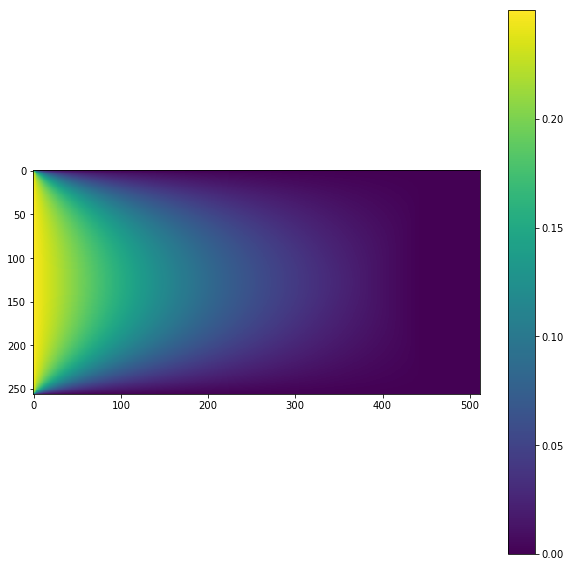

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(u)
plt.colorbar()
plt.show()

#### Exercice 5

Ecrivez une fonction **laplacianSparse** qui prend en paramètre $N$, $M$ et les pas de discrétisation et qui retourne une matrice creuse construite à l'aide du module **sparse** de **scipy**.

**Ingédients**: 

- scipy.sparse.diags
- scipy.sparse.eye
- scipy.sparse.kron

In [6]:
import scipy.sparse as sps

def laplacianSparse(h, nx, ny):
    cx = 1./h[0]**2
    cy = 1./h[1]**2
    
    Mx = cx*sps.diags([-1, 2, -1], [-1, 0, 1], shape=(nx, nx))
    My = cy*sps.diags([-1, 2, -1], [-1, 0, 1], shape=(ny, ny))
    Ix = sps.eye(nx)
    Iy = sps.eye(ny)
    return sps.kron(My, Ix) + sps.kron(Iy, Mx)


#### Exercice 6
Testez la méthode du gradient conjugué sur cette matrice.

In [7]:
def mymatmult(x, A):
    return A*x

A = laplacianSparse(h, nx, ny)
u = np.zeros(nx*ny)
conjugateGradient(mymatmult, b.flatten(), u, myProdScal, extraMatMult=(A,))

conjugate gradient: ite 1 residual 0.4996322227095351
conjugate gradient: ite 2 residual 0.33281357409481505
conjugate gradient: ite 3 residual 0.24951170436810538
conjugate gradient: ite 4 residual 0.19988163009214044
conjugate gradient: ite 5 residual 0.16786698642385373
conjugate gradient: ite 6 residual 0.14776087195443338
conjugate gradient: ite 7 residual 0.13520172595139568
conjugate gradient: ite 8 residual 0.12075250786598235
conjugate gradient: ite 9 residual 0.1067157397579598
conjugate gradient: ite 10 residual 0.0981168387294964
conjugate gradient: ite 11 residual 0.09224401472131322
conjugate gradient: ite 12 residual 0.08459308304838764
conjugate gradient: ite 13 residual 0.07771153010574668
conjugate gradient: ite 14 residual 0.07358527990288223
conjugate gradient: ite 15 residual 0.06974875816107555
conjugate gradient: ite 16 residual 0.06484479245794056
conjugate gradient: ite 17 residual 0.06118241345482581
conjugate gradient: ite 18 residual 0.05878902686731946
conj

conjugate gradient: ite 153 residual 0.006223183630570685
conjugate gradient: ite 154 residual 0.006176831718434141
conjugate gradient: ite 155 residual 0.006131881553350948
conjugate gradient: ite 156 residual 0.006077298530351091
conjugate gradient: ite 157 residual 0.00602819293938331
conjugate gradient: ite 158 residual 0.005986919756144653
conjugate gradient: ite 159 residual 0.005937537127600693
conjugate gradient: ite 160 residual 0.005886471773921156
conjugate gradient: ite 161 residual 0.005845597255786347
conjugate gradient: ite 162 residual 0.0058021975536953485
conjugate gradient: ite 163 residual 0.0057516601790787575
conjugate gradient: ite 164 residual 0.005708843285804135
conjugate gradient: ite 165 residual 0.005670049278392226
conjugate gradient: ite 166 residual 0.0056228510409449504
conjugate gradient: ite 167 residual 0.005577658541923195
conjugate gradient: ite 168 residual 0.005540760143692678
conjugate gradient: ite 169 residual 0.005498613935036207
conjugate gr

conjugate gradient: ite 295 residual 0.0024279026322414285
conjugate gradient: ite 296 residual 0.0024134227752423826
conjugate gradient: ite 297 residual 0.0024001693286303236
conjugate gradient: ite 298 residual 0.0023853226041432806
conjugate gradient: ite 299 residual 0.0023704018832806056
conjugate gradient: ite 300 residual 0.002357311250352963
conjugate gradient: ite 301 residual 0.002343498296055237
conjugate gradient: ite 302 residual 0.002328510459859966
conjugate gradient: ite 303 residual 0.0023151051226941604
conjugate gradient: ite 304 residual 0.00230220334118496
conjugate gradient: ite 305 residual 0.0022877128452561133
conjugate gradient: ite 306 residual 0.002273865710023307
conjugate gradient: ite 307 residual 0.002261470767599169
conjugate gradient: ite 308 residual 0.002247885131962452
conjugate gradient: ite 309 residual 0.002233769443928713
conjugate gradient: ite 310 residual 0.002221328833994136
conjugate gradient: ite 311 residual 0.002208680980558498
conjugat

conjugate gradient: ite 435 residual 0.001091333600773954
conjugate gradient: ite 436 residual 0.001085555757518392
conjugate gradient: ite 437 residual 0.0010793064104184832
conjugate gradient: ite 438 residual 0.0010732160920779417
conjugate gradient: ite 439 residual 0.0010675831538410258
conjugate gradient: ite 440 residual 0.0010616272264409243
conjugate gradient: ite 441 residual 0.0010554916942115383
conjugate gradient: ite 442 residual 0.0010498573108179492
conjugate gradient: ite 443 residual 0.0010441997949528054
conjugate gradient: ite 444 residual 0.0010381463075354895
conjugate gradient: ite 445 residual 0.0010324245859338432
conjugate gradient: ite 446 residual 0.0010269903326200903
conjugate gradient: ite 447 residual 0.0010211472494967698
conjugate gradient: ite 448 residual 0.001015330074322783
conjugate gradient: ite 449 residual 0.0010099849376028153
conjugate gradient: ite 450 residual 0.0010044339943791065
conjugate gradient: ite 451 residual 0.0009986107462194636


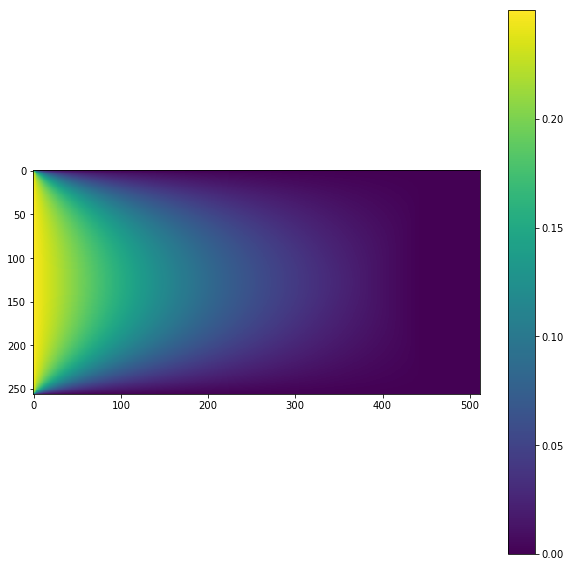

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plt.imshow(u.reshape(ny,nx))
plt.colorbar()
plt.show()

#### Exercice 7
Testez le gradient conjugué que l'on trouve dans le module de **linalg** de **scipy.sparse**. Vérifiez que l'on obtient bien la même chose qu'avec le gradient conjugué écrit précédemment.

In [9]:
from numpy.linalg import norm
from scipy.sparse.linalg import isolve

k, r0 = 0, 0
def show_residual(xk):
    global k, r0
    if k == 0:
        r0 = norm(A*xk - b.flatten())
    print(f"iteration {k} -> residu = {norm(A*xk - b.flatten())/r0}")
    k += 1
    
u, info = isolve.cg(A, b.flatten(), tol=1.e-6, maxiter=500, M=None , callback=show_residual)

iteration 0 -> residu = 1.0
iteration 1 -> residu = 0.6661171136840367
iteration 2 -> residu = 0.49939073788113314
iteration 3 -> residu = 0.40005752432893654
iteration 4 -> residu = 0.3359811052888085
iteration 5 -> residu = 0.29573927628830105
iteration 6 -> residu = 0.27060249480745724
iteration 7 -> residu = 0.24168278661278889
iteration 8 -> residu = 0.2135885855784755
iteration 9 -> residu = 0.19637812428790646
iteration 10 -> residu = 0.18462383034678617
iteration 11 -> residu = 0.16931070336023138
iteration 12 -> residu = 0.1555374665074884
iteration 13 -> residu = 0.14727889146905784
iteration 14 -> residu = 0.13960019988867683
iteration 15 -> residu = 0.1297850489031372
iteration 16 -> residu = 0.12245489917169398
iteration 17 -> residu = 0.1176646024719997
iteration 18 -> residu = 0.11156175850395794
iteration 19 -> residu = 0.10523220171551398
iteration 20 -> residu = 0.10116807489800748
iteration 21 -> residu = 0.09747425002968663
iteration 22 -> residu = 0.092592324767924

iteration 193 -> residu = 0.009180926520482597
iteration 194 -> residu = 0.009124308880857197
iteration 195 -> residu = 0.009062595780466658
iteration 196 -> residu = 0.008993382039152925
iteration 197 -> residu = 0.008934802083086842
iteration 198 -> residu = 0.008879190126823023
iteration 199 -> residu = 0.008813057120622983
iteration 200 -> residu = 0.008751322727441288
iteration 201 -> residu = 0.008698844812223909
iteration 202 -> residu = 0.008638407525389694
iteration 203 -> residu = 0.008574750344638067
iteration 204 -> residu = 0.00852199715207045
iteration 205 -> residu = 0.00846774728516357
iteration 206 -> residu = 0.008405023211403954
iteration 207 -> residu = 0.008349770011489717
iteration 208 -> residu = 0.008299959146271189
iteration 209 -> residu = 0.008241139318252245
iteration 210 -> residu = 0.00818326989489389
iteration 211 -> residu = 0.00813489548524021
iteration 212 -> residu = 0.008081596617989071
iteration 213 -> residu = 0.008022967339381178
iteration 214 -> 

iteration 385 -> residu = 0.0028715613430687174
iteration 386 -> residu = 0.002854756138351551
iteration 387 -> residu = 0.002839567749116977
iteration 388 -> residu = 0.0028238709758539923
iteration 389 -> residu = 0.0028071290646085986
iteration 390 -> residu = 0.0027917253528071677
iteration 391 -> residu = 0.002776834853970621
iteration 392 -> residu = 0.0027605647098571644
iteration 393 -> residu = 0.0027447977679697813
iteration 394 -> residu = 0.0027303564471731646
iteration 395 -> residu = 0.0027149246675539983
iteration 396 -> residu = 0.0026989640703358932
iteration 397 -> residu = 0.0026844871013488
iteration 398 -> residu = 0.0026699359607180386
iteration 399 -> residu = 0.0026542107475137785
iteration 400 -> residu = 0.0026394431973878934
iteration 401 -> residu = 0.0026255046908200933
iteration 402 -> residu = 0.0026103748492580722
iteration 403 -> residu = 0.0025953257328700254
iteration 404 -> residu = 0.0025816339828619145
iteration 405 -> residu = 0.002567321040417908

#### Exercice 8
Ecrivez un schéma d'Euler explicite. Le prototype de la fonction Python est

In [4]:
def euler(u, dt, f, fargs=()):
    """
    Euler explicite pour un systeme 

    d u
    --- = f(u, t)
    d t
    
    Parameters :
    ------------

    u: solution a l'instant n
    
    dt:  pas de temps du schema
    
    f: fonction second membre

    fargs: parametres optionnels de la fonction autre que u

    Output :
    --------

    solution a l'instant n + 1

    """  
    return u + dt*f(u, *fargs)

#### Exercice 9
Testez votre fonction **euler** en résolvant l'équation de la chaleur

$$
\left\{
\begin{array}{l}
\frac{\partial u}{\partial t}-\Delta u = 0 \; \text{sur} \; \Omega, \\\\
u = 0 \; \text{sur} \; \partial \Omega.
\end{array}
\right.
$$

en prenant la solution initiale suivante

$$
u_0(x, y) = 100e^{-100((x-0.5)^2 + (y -0.5)^2))}.
$$

On prendra comme domaine $\Omega=[0, 1]\times[0,1]$, comme pas d'espace $h_x=0.01$, $h_y=0.01$ et enfin comme pas de temps $dt=h_x^2/4$.

In [12]:
import numpy as np
def initSol(nx, ny, h, Lx=[0., 1.], Ly=[0., 1.]):
    """
    Initialisation d'une fonction pour tester le schéma en temps

    """
    x, y = np.meshgrid(np.linspace(Lx[0] + h[0], Lx[1] - h[0], nx), 
                       np.linspace(Ly[0] + h[1], Ly[1] - h[1], ny), sparse=True)
    return 100.*np.exp(-100.*((x - .5)**2 + (y - .5)**2))

nx = ny = 250
h = [1./(nx + 1), 1./(ny + 1)]
u = initSol(nx, ny, h)

dt = np.min(h)**2/10.
nite = 500

#fig = plt.figure(figsize=(10, 10))
#plot = plt.imshow(u)

#### Exercice 10

Représentez la solution 2d à l'aide de **matplotlib** et de **animation**.

<IPython.core.display.Javascript object>


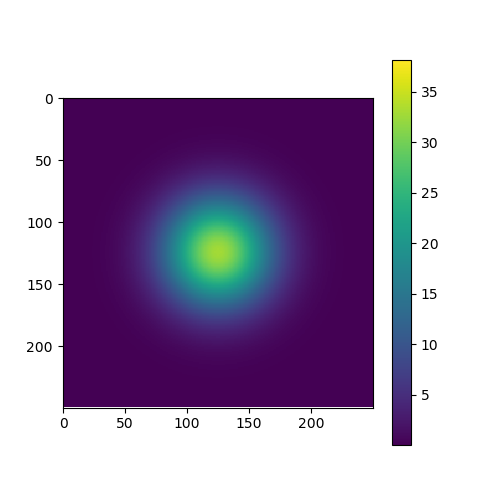

In [15]:
%matplotlib nbagg
from matplotlib import animation
import matplotlib.pyplot as plt 

def laplacian(u, h):
    """
    Produit matrice-vecteur du Laplacien sans assemblage de la matrice

    """
    cx = -1./h[0]**2
    cy = -1./h[1]**2
    c = -2.*(cx + cy)

    lap = c*u
    lap[:, :-1] += cx*u[:, 1:]
    lap[:, 1:] += cx*u[:, :-1]
    lap[1:, :] += cy*u[:-1, :]
    lap[:-1, :] += cy*u[1:, :]
    
    return lap

def animate(i):
    u[:] = euler(u, -dt, laplacian, fargs=(h,))
    plot.set_data(u)
    return plot

fig = plt.figure(figsize=(5, 5))
plot = plt.imshow(u)
plt.colorbar()

anim = animation.FuncAnimation(fig, animate, interval=10)
plt.show()

In [13]:
# execute this part to modify the css style
from IPython.core.display import HTML
def css_styling():
    styles = open("../../style/custom.css").read()
    return HTML(styles)
css_styling()